In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, auc



In [2]:
df= pd.read_csv('C:\Projects\Credit Card Fraud Detection\Dataset\creditcard_2023.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
X=df.drop(['id','Class'],axis=1,errors='ignore')
y=df['Class']

In [6]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
X_train.shape

(454904, 29)

In [9]:
X_test.shape

(113726, 29)

In [10]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [11]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


In [24]:
rf_model= RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

In [28]:
cv_scores=cross_val_score(rf_model,X_train_scaled,y_train,cv=5,scoring='f1')
print('\nCross-validation F1 scores:',cv_scores)
print('\nAverage F1 Score:',np.mean(cv_scores))


Cross-validation F1 scores: [0.98470321 0.98644528 0.98474499 0.98431399 0.98386053]

Average F1 Score: 0.9848135979171477


In [32]:
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [34]:
y_pred=rf_model.predict(X_test_scaled)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



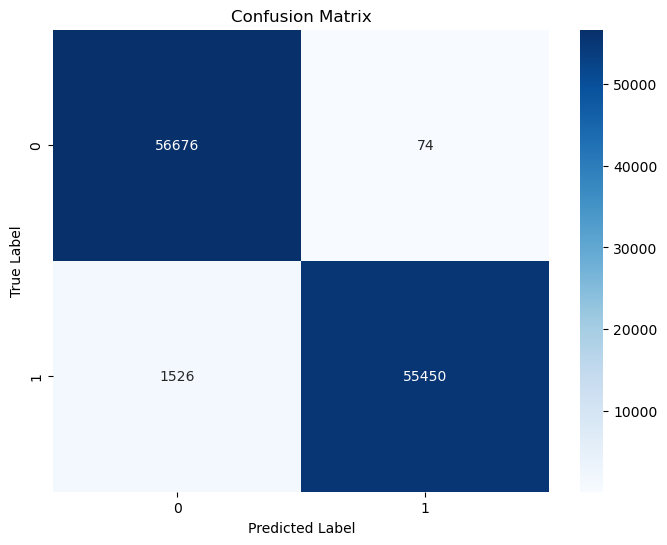

In [46]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [48]:
importance=rf_model.feature_importances_
feature_imp=pd.DataFrame(
    {
        'Feature': X.columns,
        'Importance': importance
    }
).sort_values('Importance',ascending=False)

In [50]:
feature_imp.head()

,Feature,Importance
9,V10,0.171738
3,V4,0.159135
13,V14,0.145887
11,V12,0.114408
10,V11,0.089950


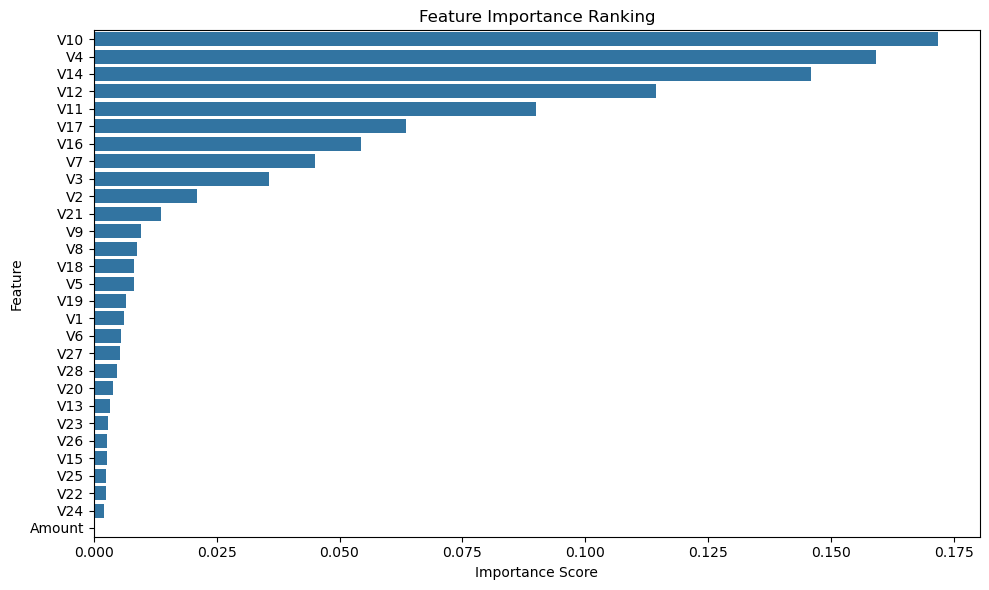

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp,x='Importance',y='Feature')
plt.title('Feature Importance Ranking')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

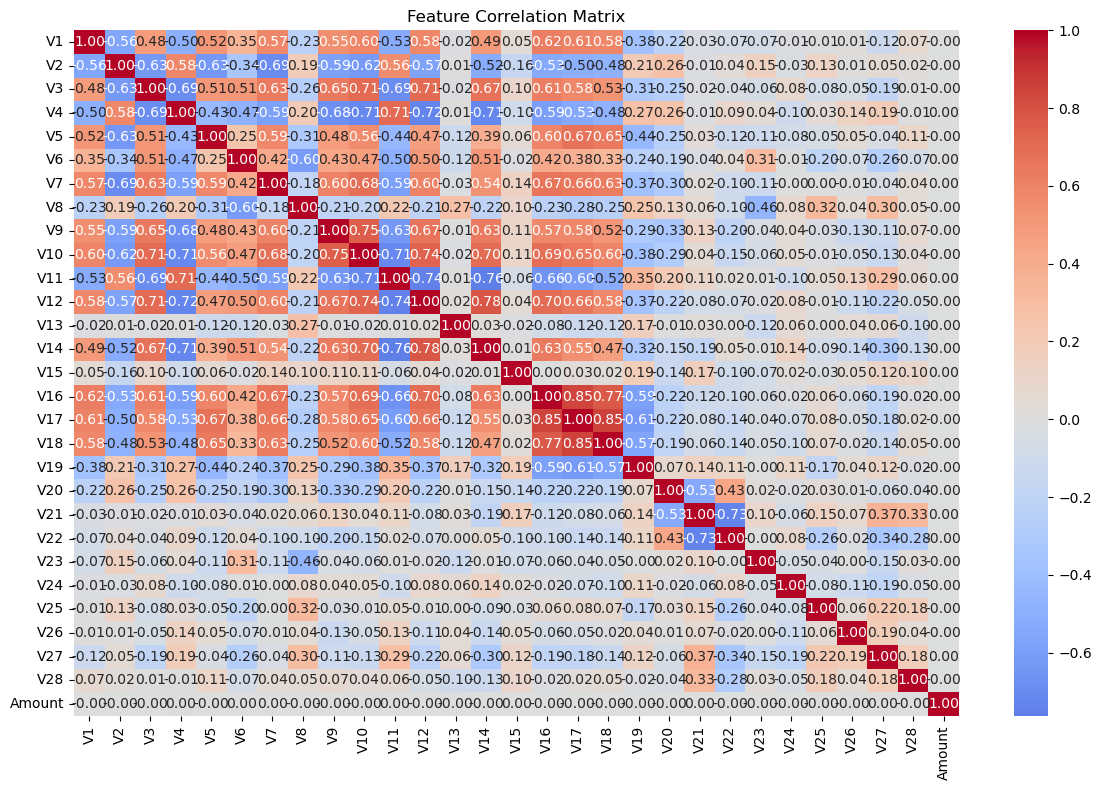

In [54]:
plt.figure(figsize=(12,8))
correlation_matrix=X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm',center=0,annot=True,fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [56]:
y_pred_proba=rf_model.predict_proba(X_test_scaled)[:,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

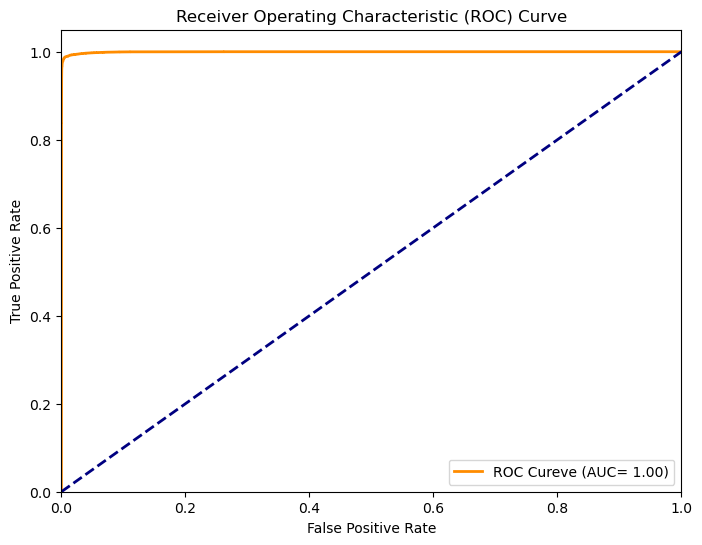

In [58]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'ROC Cureve (AUC= {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()